# Выбор локации для скважины



Предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

### Подготовка данных по первому региону

In [2]:
df_0 = pd.read_csv('/datasets/geo_data_0.csv')
df_0.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [3]:
df_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [4]:
df_0.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

В данных по первому региону отсутсвуют пропуски, типы данных определены верно

In [5]:
df_0.duplicated().sum()

0

В данных отсутсвуют явные дубликаты, но необходимо проверить чтобы номера скважин в столбце id были также уникальными.

In [6]:
df_0.duplicated('id').sum()

10

In [7]:
df_0 = df_0.drop_duplicates(subset=['id'], keep='first')

In [8]:
df_0.describe()

,f0,f1,f2,product
count,99990.000000,99990.000000,99990.000000,99990.000000
mean,0.500454,0.250141,2.502629,92.499684
std,0.871844,0.504430,3.248149,44.288304
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072572,-0.200877,0.287784,56.497069
50%,0.502405,0.250252,2.515969,91.847928
75%,1.073626,0.700640,4.715035,128.563699
max,2.362331,1.343769,16.003790,185.364347


Text(0, 0.5, 'Количество')

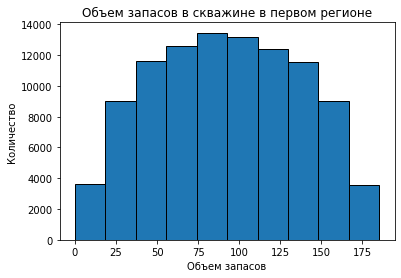

In [9]:
plt.hist(df_0['product'], bins=10, edgecolor = 'black')
plt.title('Объем запасов в скважине в первом регионе')
plt.xlabel('Объем запасов')
plt.ylabel('Количество');

Для первого региона характерно нормальное распределение объема запасов по скважинам

In [10]:
df_0 = df_0.set_index('id')

In [11]:
def split(df):
    target = df['product']
    features = df.drop('product', axis=1)
    features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=12345)
    print('Размер тренировочной выборки:', features_train.shape)
    print('Размер тестовой выборки:',features_valid.shape)
    return features_train, features_valid, target_train, target_valid

In [13]:
features0_train, features0_valid, target0_train, target0_valid = split(df_0)

Размер тренировочной выборки: (74992, 3)
Размер тестовой выборки: (24998, 3)


### Подготовка данных по второму региону

In [14]:
df_1 = pd.read_csv('/datasets/geo_data_1.csv')
df_1.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [15]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [16]:
df_1.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

В данных по второму региону отсутсвуют пропуски, типы данных определены верно

In [17]:
df_1.duplicated().sum()

0

В данных отсутствуют явные дубликаты

In [18]:
df_1.duplicated('id').sum()

4

In [19]:
df_1 = df_1.drop_duplicates(subset=['id'], keep='first')

In [20]:
df_1.describe()

,f0,f1,f2,product
count,99996.000000,99996.000000,99996.000000,99996.000000
mean,1.141209,-4.796608,2.494501,68.823916
std,8.965815,5.119906,1.703579,45.944663
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011475,57.085625
75%,8.620964,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


Text(0, 0.5, 'Количество')

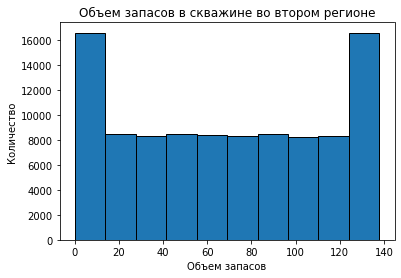

In [21]:
plt.hist(df_1['product'], bins=10, edgecolor = 'black')
plt.title('Объем запасов в скважине во втором регионе')
plt.xlabel('Объем запасов')
plt.ylabel('Количество');

Во втором регионе наблюдается достаточно интересное распределение значений объема запасов по скважинам:
- Запасы распределены достаточно равномерно
- Пики на графиках характерны для скважин с минимальным и максимальным значениями объема запасов.

In [22]:
df_1 = df_1.set_index('id')

In [24]:
features1_train, features1_valid, target1_train, target1_valid = split(df_1)

Размер тренировочной выборки: (74997, 3)
Размер тестовой выборки: (24999, 3)


### Подготовка данных по третьему региону

In [25]:
df_2 = pd.read_csv('/datasets/geo_data_2.csv')
df_2.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [26]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [27]:
df_2.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

В данных по третьему региону отсутсвуют пропуски, типы данных определены верно

In [28]:
df_2.duplicated().sum()

0

В данных отсутсвуют явные дубликаты

In [29]:
df_2.duplicated('id').sum()

4

In [30]:
df_2 = df_2.drop_duplicates(subset=['id'], keep='first')

In [31]:
df_2.describe()

,f0,f1,f2,product
count,99996.000000,99996.000000,99996.000000,99996.000000
mean,0.002002,-0.002159,2.495084,94.998342
std,1.732052,1.730397,3.473482,44.749573
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162328,-1.174841,0.130269,59.450028
50%,0.009424,-0.009661,2.484236,94.925026
75%,1.158477,1.163523,4.858720,130.586815
max,7.238262,7.844801,16.739402,190.029838


Text(0, 0.5, 'Количество')

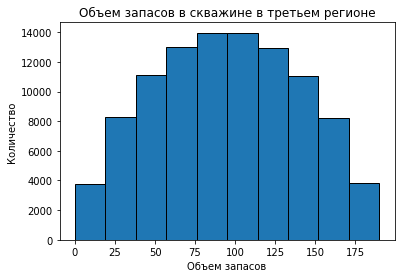

In [32]:
plt.hist(df_2['product'], bins=10, edgecolor = 'black')
plt.title('Объем запасов в скважине в третьем регионе')
plt.xlabel('Объем запасов')
plt.ylabel('Количество');

Для третьего региона характерно нормальное распределение объема запасов по скважинам

In [33]:
df_2 = df_2.set_index('id')

In [35]:
features2_train, features2_valid, target2_train, target2_valid = split(df_2)

Размер тренировочной выборки: (74997, 3)
Размер тестовой выборки: (24999, 3)


In [36]:
df_0.corr()

,f0,f1,f2,product
f0,1.000000,-0.440717,-0.003211,0.143504
f1,-0.440717,1.000000,0.001764,-0.192351
f2,-0.003211,0.001764,1.000000,0.483631
product,0.143504,-0.192351,0.483631,1.000000


In [37]:
df_1.corr()

,f0,f1,f2,product
f0,1.000000,0.182279,-0.001810,-0.030523
f1,0.182279,1.000000,-0.002594,-0.010154
f2,-0.001810,-0.002594,1.000000,0.999397
product,-0.030523,-0.010154,0.999397,1.000000


In [38]:
df_2.corr()

,f0,f1,f2,product
f0,1.000000,0.000506,-0.000452,-0.001978
f1,0.000506,1.000000,0.000753,-0.001055
f2,-0.000452,0.000753,1.000000,0.445867
product,-0.001978,-0.001055,0.445867,1.000000


Во всех наборах данных наиболее сильную корреляцию с целевым признаком имеет признак f2, особенно во втором регионе, где коэффициент корреляции между f2 и product практически равна 1.

In [42]:
def scalers(features_train, features_valid):
    scaler = StandardScaler()
    scaler.fit(features_train)
    return scaler.transform(features_train), scaler.transform(features_valid)

In [43]:
features0_train, features0_valid = scalers(features0_train, features0_valid)
features1_train, features1_valid = scalers(features1_train, features1_valid)
features2_train, features2_valid = scalers(features2_train, features2_valid)

### Вывод

В данных представлены следующие параметры:
- id — уникальный идентификатор скважины;
- f0, f1, f2 — три признака точек;
- product — объём запасов в скважине (тыс. баррелей).

Для каждого из регионов в данных отсутсвуют пропуски и явные дубликаты, пстроки с повторяющимися номерами скважин удалены.

Во всех наборах данных наиболее сильную корреляцию с целевым признаком имеет признак f2, особенно во втором регионе, где коэффициент корреляции между f2 и product практически равна 1.

Целевым признаком является значение объема запасов в скважине. 
Для первого и третьего регионов характерно нормальное распределение значений объема запасов.
Для второго региона чаще всего в скважинах получают либо очень большие, либо слишком низке объемы запасов

Для ответа на поставленные бизнесом вопросы необходимо решить задачу регрессии.

## Обучение и проверка модели

По условию задачи для обучения модели подходит только линейная регрессия (остальные — недостаточно предсказуемые).

In [44]:
def modeling (features_train, target_train, features_valid, target_valid):
    model = LinearRegression()
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)
    print('RMSE =',round((mean_squared_error(target_valid, predictions)) ** 0.5, 2))
    print('Cредний запас предсказанного сырья =', round(predictions.mean(), 2))
    return predictions

### Обучение модели для первого региона

In [45]:
predicted0_valid = modeling(features0_train, target0_train, features0_valid, target0_valid)

RMSE = 37.85
Cредний запас предсказанного сырья = 92.79


### Обучение модели для второго региона

In [48]:
predicted1_valid = modeling(features1_train, target1_train, features1_valid, target1_valid)

RMSE = 0.89
Cредний запас предсказанного сырья = 69.18


### Обучение модели для третьего региона

In [50]:
predicted2_valid = modeling(features2_train, target2_train, features2_valid, target2_valid)

RMSE = 40.08
Cредний запас предсказанного сырья = 94.87


### Вывод

По результатам обучения модели посчитаны метрика RMSE и среднее значение по скважинам.

Для первого региона:
+ RMSE = 37.85
+ Cредний запас предсказанного сырья = 92.79

Получено достаточно высокое значение корня средней квадратичной ошибки

Для второго региона: 
+ RMSE = 0.89
+ Cредний запас предсказанного сырья = 69.18

В данном регионе среднее значение запасов довольно низкое, зато предсказания самые точные

Для третьего региона:
+ RMSE = 40.08
+ Cредний запас предсказанного сырья = 94.87

Для третьего региона получено самое высокое среднее значение запасов, но предсказания с большим значением ошибки

## Подготовка к расчёту прибыли

Согласно условию задачи:
- Бюджет на разработку скважин в регионе — 10 млрд рублей.
- При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.
- После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.
- При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.

In [51]:
budget = 10000000000
income = 450000
top_points = 200
points = 500

In [52]:
sufficient_volume = budget/(income*top_points)
print('Достаточный объём сырья для безубыточной разработки новой скважины', sufficient_volume)

Достаточный объём сырья для безубыточной разработки новой скважины 111.11111111111111


На этапе подготовки к расчету прибыли был оценен минимальный объем запасов для безубыточной разработки новой скважины - 111 тысяч баррелей.Данное значение выше, чем средние по каждому из регионов. 

Однако, среднее значение по каждому региону рассчитано на основе 25000 скважин, в то время как разрабатываться будут только 200 наиболее перпективных скважин. На следующем шаге необходимо проанализировать возможную прибыль и риски для случайно отобранных скважин в каждом регионе для этого применяется техника Bootstrap.

## Расчёт прибыли и рисков 

In [53]:
def income_product(target, probabilities, count):
    product_sorted = probabilities.sort_values(ascending=False)
    selected = target[product_sorted.index][:count]
    return (income * selected.sum() - budget)/1000000

In [54]:
state = np.random.RandomState(12345)

In [55]:
def region_analysis(target_valid, predicted_valid):
    loss=0
    values = []
    for i in range(1000):
        predicted_valid = pd.Series(predicted_valid, index=target_valid.index)
        target_subsample = target_valid.sample(n=points, replace=True, random_state=state)
        probs_subsample = predicted_valid[target_subsample.index]
        res = income_product(target_subsample, probs_subsample, top_points)
        values.append(res)
        if res<0:
            loss +=1

    values = pd.Series(values)
    confidence_interval = st.t.interval(0.95, len(values)-1, values.mean(), values.sem())
    print('Средняя прибыль в регионе равна', round(values.mean(), 2), 'млн. руб')
    print('Вероятность убытков', round(loss/1000*100, 1), '%')
    print('Доверительный интервал:', confidence_interval, 'млн. руб')

### Первый регион

In [57]:
region_analysis(target0_valid, predicted0_valid)

Средняя прибыль в регионе равна 409.43 млн. руб
Вероятность убытков 7.1 %
Доверительный интервал: (392.4363122689626, 426.41976497390937) млн. руб


### Второй регион

In [59]:
region_analysis(target1_valid, predicted1_valid)

Средняя прибыль в регионе равна 536.4 млн. руб
Вероятность убытков 0.3 %
Доверительный интервал: (522.8781010596214, 549.9222978105848) млн. руб


### Третий регион

In [61]:
region_analysis(target2_valid, predicted2_valid)

Средняя прибыль в регионе равна 339.48 млн. руб
Вероятность убытков 11.8 %
Доверительный интервал: (322.0794420623008, 356.87662633329853) млн. руб


### Вывод

Для первого региона:
+ Средняя прибыль в регионе равна 409.43 млн. руб
+ Вероятность убытков 7.1 %
+ Доверительный интервал: (392.4363122689626, 426.41976497390937) млн. руб

Для второго региона:
+ Средняя прибыль в регионе равна 536.4 млн. руб
+ Вероятность убытков 0.3 %
+ Доверительный интервал: (522.8781010596214, 549.9222978105848) млн. руб

Для третьего региона:
+ Средняя прибыль в регионе равна 339.48 млн. руб
+ Вероятность убытков 11.8 %
+ Доверительный интервал: (322.0794420623008, 356.87662633329853) млн. руб

Наибольшее среднее значение прибыли отмечается во втром регионе, для которого вероятность убытков также минимальна. В первом и третьем регионах вероятность убытков выше граничных 2,5 процентов.

## Итоговый вывод

Добывающей компании «ГлавРосГосНефть» необходимо решить, где бурить новую скважину.

Для работы предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. 
Цнль: построить модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализировать возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

В данных представлены следующие параметры:
- id — уникальный идентификатор скважины;
- f0, f1, f2 — три признака точек;
- product — объём запасов в скважине (тыс. баррелей).

Для каждого из регионов в данных отсутсвуют пропуски и явные дубликаты, пстроки с повторяющимися номерами скважин удалены.

Во всех наборах данных наиболее сильную корреляцию с целевым признаком имеет признак f2, особенно во втором регионе, где коэффициент корреляции между f2 и product практически равна 1.

Целевым признаком является значение объема запасов в скважине. 
Для первого и третьего регионов характерно нормальное распределение значений объема запасов, то есть скважин с большими запасами меньше, чем со средними.

Для второго региона чаще всего в скважинах получают либо очень большие, либо слишком низке объемы запасов

Для ответа на поставленные бизнесом вопросы необходимо решить задачу регрессии. По условию задачи для обучения модели подходит только линейная регрессия (остальные — недостаточно предсказуемые).

По результатам обучения модели посчитаны метрика RMSE и среднее значение по скважинам.

Для первого региона:
+ RMSE = 37.85
+ Cредний запас предсказанного сырья = 92.79

Получено достаточно высокое значение корня средней квадратичной ошибки

Для второго региона: 
+ RMSE = 0.89
+ Cредний запас предсказанного сырья = 69.18

В данном регионе среднее значение запасов довольно низкое, зато предсказания самые точные

Для третьего региона:
+ RMSE = 40.08
+ Cредний запас предсказанного сырья = 94.87

Для третьего региона получено самое высокое среднее значение запасов, но предсказания с большим значением ошибки

На этапе подготовки к расчету прибыли был оценен минимальный объем запасов для безубыточной разработки новой скважины - 111 тысяч баррелей.Данное значение выше, чем средние по каждому из регионов. 

Однако, среднее значение по каждому региону рассчитано на основе 25000 скважин, в то время как разрабатываться будут только 200 наиболее перпективных скважин. На следующем шаге необходимо проанализировать возможную прибыль и риски для случайно отобранных скважин в каждом регионе для этого применяется техника Bootstrap.

Для первого региона:
+ Средняя прибыль в регионе равна 409.43 млн. руб
+ Вероятность убытков 7.1 %
+ Доверительный интервал: (392.4363122689626, 426.41976497390937) млн. руб

Для второго региона:
+ Средняя прибыль в регионе равна 536.4 млн. руб
+ Вероятность убытков 0.3 %
+ Доверительный интервал: (522.8781010596214, 549.9222978105848) млн. руб

Для третьего региона:
+ Средняя прибыль в регионе равна 339.48 млн. руб
+ Вероятность убытков 11.8 %
+ Доверительный интервал: (322.0794420623008, 356.87662633329853) млн. руб

Наибольшее среднее значение прибыли отмечается во втром регионе, для которого вероятность убытков также минимальна. В первом и третьем регионах вероятность убытков выше граничных 2,5 процентов.

Таким образом, рекомендуется бурить новые скважины во втором регионе, так как на основе предоставленных данных мы имеем наиболее предсказуемые объемы запасов в скважинах и максимальное значение средней получаемой прибыли.